In [1]:
import numpy as np
import pandas as pd
import datetime

In [2]:
ferrara = pd.read_json('http://api.openweathermap.org/data/2.5/history/city?q=Ferrara,IT')

In [3]:
torino = pd.read_json('http://api.openweathermap.org/data/2.5/history/city?q=Torino,IT')

In [4]:
mantova = pd.read_json('http://api.openweathermap.org/data/2.5/history/city?q=Mantova,IT')

In [5]:
milano = pd.read_json('http://api.openweathermap.org/data/2.5/history/city?q=Milano,IT')

In [6]:
ravenna = pd.read_json('http://api.openweathermap.org/data/2.5/history/city?q=Ravenna,IT')  

In [7]:
asti = pd.read_json('http://api.openweathermap.org/data/2.5/history/city?q=Asti,IT')

In [8]:
bologna = pd.read_json('http://api.openweathermap.org/data/2.5/history/city?q=Bologna,IT')

In [9]:
piacenza = pd.read_json('http://api.openweathermap.org/data/2.5/history/city?q=Piacenza,IT')

In [10]:
cesena = pd.read_json('http://api.openweathermap.org/data/2.5/history/city?q=Cesena,IT')

In [11]:
faenza = pd.read_json('http://api.openweathermap.org/data/2.5/history/city?q=Faenza,IT')

In [12]:
faenza

,calctime,city_id,cnt,cod,list,message
0,0.1107,3177300,24,200,"{u'clouds': {u'all': 0}, u'rain': {u'1h': 1.26...",
1,0.1107,3177300,24,200,"{u'clouds': {u'all': 20}, u'rain': {u'1h': 1.2...",
2,0.1107,3177300,24,200,"{u'clouds': {u'all': 0}, u'rain': {u'1h': 1.26...",
3,0.1107,3177300,24,200,"{u'clouds': {u'all': 0}, u'rain': {u'1h': 1.26...",
4,0.1107,3177300,24,200,"{u'clouds': {u'all': 0}, u'rain': {u'1h': 1.26...",
5,0.1107,3177300,24,200,"{u'clouds': {u'all': 0}, u'rain': {u'1h': 1.26...",
6,0.1107,3177300,24,200,"{u'clouds': {u'all': 0}, u'rain': {u'1h': 1.26...",
7,0.1107,3177300,24,200,"{u'clouds': {u'all': 0}, u'rain': {u'1h': 1.26...",
8,0.1107,3177300,24,200,"{u'clouds': {u'all': 0}, u'rain': {u'1h': 1.26...",
9,0.1107,3177300,24,200,"{u'clouds': {u'all': 0}, u'rain': {u'1h': 1.26...",


In [13]:
def prepare(city_list,city_name):
    temp = [ ]
    humidity = [ ]
    pressure = [ ]
    description = [ ]
    dt = [ ]
    wind_speed = [ ]
    wind_deg = [ ]
    for row in city_list:
       temp.append(row['main']['temp']-273.15)
       humidity.append(row['main']['humidity'])
       pressure.append(row['main']['pressure'])
       description.append(row['weather'][0]['description'])
       dt.append(row['dt'])
       wind_speed.append(row['wind']['speed'])
       wind_deg.append(row['wind']['deg'])
    headings = ['temp','humidity','pressure','description','dt','wind_speed','wind_deg']
    data = [temp,humidity,pressure,description,dt,wind_speed,wind_deg]
    df = pd.DataFrame(data,index=headings)
    city = df.T
    city['city'] = city_name
    city['day'] = city['dt'].apply(datetime.datetime.fromtimestamp)
    return city

In [14]:
df_ferrara = prepare(ferrara.list,'Ferrara')
df_milano = prepare(milano.list,'Milano')
df_mantova = prepare(mantova.list,'Mantova')
df_ravenna = prepare(ravenna.list,'Ravenna')
df_torino = prepare(torino.list,'Torino')
#df_alessandria = prepare(alessandria.list,'Alessandria')
df_asti = prepare(asti.list,'Asti')
df_bologna = prepare(bologna.list,'Bologna')
df_piacenza = prepare(piacenza.list,'Piacenza')
df_cesena = prepare(cesena.list,'Cesena')
df_faenza = prepare(faenza.list,'Faenza')

In [15]:
df_faenza

,temp,humidity,pressure,description,dt,wind_speed,wind_deg,city,day
0,32.08,79,1010,moderate rain,1437730850,1.5,310,Faenza,2015-07-24 11:40:50
1,32.4,75,1009,moderate rain,1437734493,3.6,40,Faenza,2015-07-24 12:41:33
2,32.74,75,1009,moderate rain,1437738046,3.6,70,Faenza,2015-07-24 13:40:46
3,32.7,79,1009,moderate rain,1437741579,5.1,70,Faenza,2015-07-24 14:39:39
4,32.33,70,1008,moderate rain,1437745188,3.6,60,Faenza,2015-07-24 15:39:48
5,32.4,74,1008,moderate rain,1437748777,2.6,80,Faenza,2015-07-24 16:39:37
6,32.09,74,1007,moderate rain,1437752543,3.1,90,Faenza,2015-07-24 17:42:23
7,31.41,66,1007,moderate rain,1437756042,3.1,120,Faenza,2015-07-24 18:40:42
8,31.18,70,1007,moderate rain,1437759569,3.1,130,Faenza,2015-07-24 19:39:29
9,29.59,79,1007,moderate rain,1437763243,3.1,120,Faenza,2015-07-24 20:40:43


In [16]:
print df_ferrara.shape
print df_milano.shape
print df_mantova.shape
print df_ravenna.shape
print df_torino.shape
print df_asti.shape
print df_bologna.shape
print df_piacenza.shape
print df_cesena.shape
print df_faenza.shape


(24, 9)
(24, 9)
(24, 9)
(24, 9)
(24, 9)
(24, 9)
(24, 9)
(24, 9)
(24, 9)
(24, 9)


In [17]:
#http://it.thetimenow.com/distance-calculator.php
#(Comacchio)
df_ravenna['dist'] = 8
df_cesena['dist'] = 14
df_faenza['dist'] = 37
df_ferrara['dist'] = 47
df_bologna['dist'] = 71
df_mantova['dist'] = 121 
df_piacenza['dist'] = 200
df_milano['dist'] = 250
df_asti['dist'] = 315
df_torino['dist'] = 357


In [17]:
#df_ferrara.to_csv('ferrara_270615.csv')
#df_milano.to_csv('milano_270615.csv')
#df_mantova.to_csv('mantova_270615.csv')
#df_ravenna.to_csv('ravenna_270615.csv')
#df_torino.to_csv('torino_270615.csv')
#df_asti.to_csv('asti_270615.csv')
#df_bologna.to_csv('bologna_270615.csv')
#df_piacenza.to_csv('piacenza_270615.csv')
#df_cesena.to_csv('cesena_270615.csv')
#df_faenza.to_csv('faenza_270615.csv')
df_ferrara = pd.read_csv('ferrara_270615.csv')
df_milano = pd.read_csv('milano_270615.csv')
df_mantova = pd.read_csv('mantova_270615.csv')
df_ravenna = pd.read_csv('ravenna_270615.csv')
df_torino = pd.read_csv('torino_270615.csv')
df_asti = pd.read_csv('asti_270615.csv')
df_bologna = pd.read_csv('bologna_270615.csv')
df_piacenza = pd.read_csv('piacenza_270615.csv')
df_cesena = pd.read_csv('cesena_270615.csv')
df_faenza = pd.read_csv('faenza_270615.csv')

In [18]:
df_cesena

,temp,humidity,pressure,description,dt,wind_speed,wind_deg,city,day,dist
0,32.35,62,1010,moderate rain,1437730764,1,60,Cesena,2015-07-24 11:39:24,14
1,32.4,75,1009,moderate rain,1437734406,3.6,40,Cesena,2015-07-24 12:40:06,14
2,32.24,75,1009,moderate rain,1437737961,3.6,70,Cesena,2015-07-24 13:39:21,14
3,32.26,79,1009,moderate rain,1437741489,5.1,70,Cesena,2015-07-24 14:38:09,14
4,32.81,70,1008,moderate rain,1437745125,3.6,60,Cesena,2015-07-24 15:38:45,14
5,32.33,74,1008,moderate rain,1437748719,2.6,80,Cesena,2015-07-24 16:38:39,14
6,31.89,74,1007,moderate rain,1437752423,3.1,90,Cesena,2015-07-24 17:40:23,14
7,31.54,66,1007,moderate rain,1437755950,3.1,120,Cesena,2015-07-24 18:39:10,14
8,31.32,70,1007,moderate rain,1437759500,3.1,130,Cesena,2015-07-24 19:38:20,14
9,30.28,79,1007,moderate rain,1437763156,3.1,120,Cesena,2015-07-24 20:39:16,14


In [19]:
dist = [df_ravenna['dist'][0],
     df_cesena['dist'][0],
     df_faenza['dist'][0],
     df_ferrara['dist'][0],
     df_bologna['dist'][0],
     df_mantova['dist'][0],
     df_piacenza['dist'][0],
     df_milano['dist'][0],
     df_asti['dist'][0],
     df_torino['dist'][0]
]
temp_max = [df_ravenna['temp'].max(),
     df_cesena['temp'].max(),
     df_faenza['temp'].max(),
     df_ferrara['temp'].max(),
     df_bologna['temp'].max(),
     df_mantova['temp'].max(),
     df_piacenza['temp'].max(),
     df_milano['temp'].max(),
     df_asti['temp'].max(),
     df_torino['temp'].max()
]
temp_min = [df_ravenna['temp'].min(),
     df_cesena['temp'].min(),
     df_faenza['temp'].min(),
     df_ferrara['temp'].min(),
     df_bologna['temp'].min(),
     df_mantova['temp'].min(),
     df_piacenza['temp'].min(),
     df_milano['temp'].min(),
     df_asti['temp'].min(),
     df_torino['temp'].min()
]
hum_min = [df_ravenna['humidity'].min(),
     df_cesena['humidity'].min(),
     df_faenza['humidity'].min(),
     df_ferrara['humidity'].min(),
     df_bologna['humidity'].min(),
     df_mantova['humidity'].min(),
     df_piacenza['humidity'].min(),
     df_milano['humidity'].min(),
     df_asti['humidity'].min(),
     df_torino['humidity'].min()
]
hum_max = [df_ravenna['humidity'].max(),
     df_cesena['humidity'].max(),
     df_faenza['humidity'].max(),
     df_ferrara['humidity'].max(),
     df_bologna['humidity'].max(),
     df_mantova['humidity'].max(),
     df_piacenza['humidity'].max(),
     df_milano['humidity'].max(),
     df_asti['humidity'].max(),
     df_torino['humidity'].max()
]

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

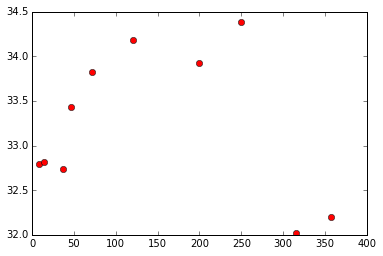

In [21]:
#temperatura massima
plt.plot(dist,temp_max,'ro')

In [22]:
x = np.array(dist)
y = np.array(temp_max)
x1 = x[x<100]
x1 = x1.reshape((x1.size,1))
y1 = y[x<100]
x2 = x[x>50]
x2 = x2.reshape((x2.size,1))
y2 = y[x>50]

In [23]:
from sklearn.svm import SVR
svr_lin1 = SVR(kernel='linear', C=1e3)
svr_lin2 = SVR(kernel='linear', C=1e3)
svr_lin1.fit(x1, y1)
svr_lin2.fit(x2, y2)
xp1 = np.arange(10,100,10).reshape((9,1))
xp2 = np.arange(50,400,50).reshape((7,1))
yp1 = svr_lin1.predict(xp1)
yp2 = svr_lin2.predict(xp2)


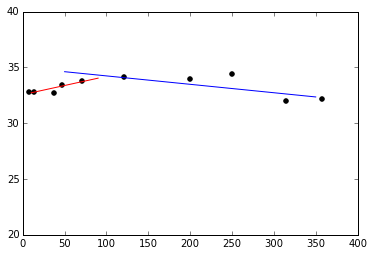

In [24]:
plt.plot(xp1, yp1, c='r', label='Strong sea effect')
plt.plot(xp2, yp2, c='b', label='Light sea effect')
plt.axis((0,400,20,40))
plt.scatter(x, y, c='k', label='data')

In [25]:
from scipy.optimize import fsolve

def line1(x):
    a1 = svr_lin1.coef_[0][0]
    b1 = svr_lin1.intercept_[0]
    return -a1*x + b1
def line2(x):
    a2 = svr_lin2.coef_[0][0]
    b2 = svr_lin2.intercept_[0]
    return -a2*x + b2
def findIntersection(fun1,fun2,x0):
 return fsolve(lambda x : fun1(x) - fun2(x),x0)

result = findIntersection(line1,line2,0.0)
print "[x,y] = [ %d , %d ]" % (result,line1(result))
x = numpy.linspace(0,300,31)
plt.plot(x,line1(x),x,line2(x),result,line1(result),'ro')

[x,y] = [ 101 , 34 ]


NameError: name 'numpy' is not defined

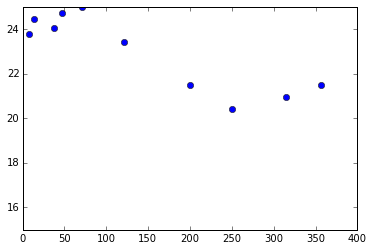

In [26]:
#temperatures min
plt.axis((0,400,15,25))
plt.plot(dist,temp_min,'bo')

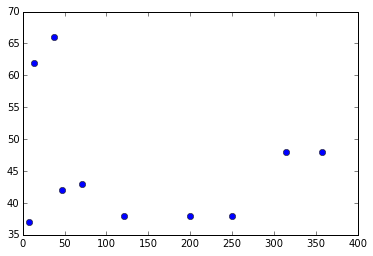

In [27]:
#min humidity
plt.plot(dist,hum_min,'bo')

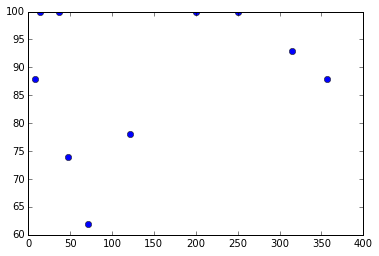

In [28]:
#max humidity
plt.plot(dist,hum_max,'bo')

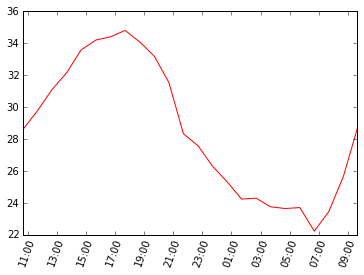

In [47]:
#temperature
y1 = df_milano['temp']
x1 = df_milano['day']
fig, ax = plt.subplots()
plt.xticks(rotation=70)
hours = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(hours)
ax.plot(x1,y1,'r')

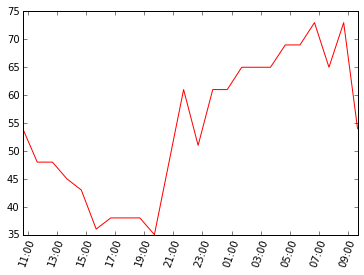

In [48]:
#humidity
y1 = df_milano['humidity']
x1 = df_milano['day']
fig, ax = plt.subplots()
plt.xticks(rotation=70)
hours = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(hours)
ax.plot(x1,y1,'r')

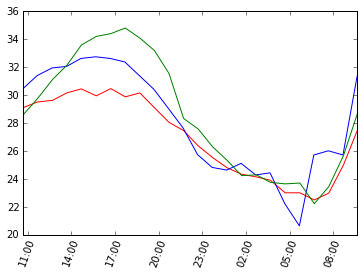

In [49]:
y1 = df_ravenna['temp']
x1 = df_ravenna['day']
y2 = df_ferrara['temp']
x2 = df_ferrara['day']
y3 = df_milano['temp']
x3 = df_milano['day']
fig, ax = plt.subplots()
plt.xticks(rotation=70)
hours = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(hours)
plt.plot(x1,y1,'r',x2,y2,'b',x3,y3,'g')

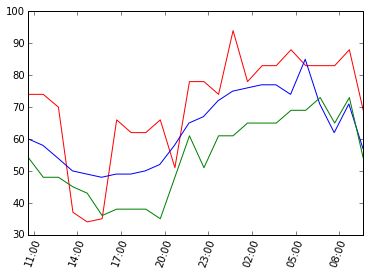

In [50]:
y1 = df_ravenna['humidity']
x1 = df_ravenna['day']
y2 = df_ferrara['humidity']
x2 = df_ferrara['day']
y3 = df_milano['humidity']
x3 = df_milano['day']
fig, ax = plt.subplots()
plt.xticks(rotation=70)
hours = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(hours)
plt.plot(x1,y1,'r',x2,y2,'b',x3,y3,'g')

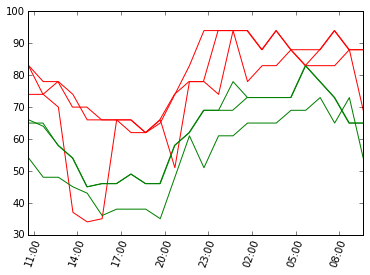

In [51]:
y1 = df_ravenna['humidity']
x1 = df_ravenna['day']
y2 = df_faenza['humidity']
x2 = df_faenza['day']
y3 = df_cesena['humidity']
x3 = df_cesena['day']
y4 = df_milano['humidity']
x4 = df_milano['day']
y5 = df_asti['humidity']
x5 = df_asti['day']
y6 = df_torino['humidity']
x6 = df_torino['day']
fig, ax = plt.subplots()
plt.xticks(rotation=70)
hours = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(hours)
plt.plot(x1,y1,'r',x2,y2,'r',x3,y3,'r')
plt.plot(x4,y4,'g',x5,y5,'g',x6,y6,'g')

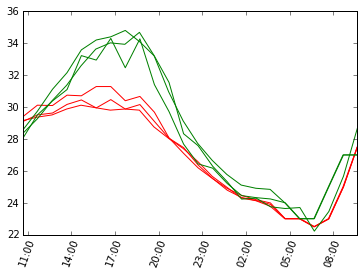

In [52]:
y1 = df_ravenna['temp']
x1 = df_ravenna['day']
y2 = df_faenza['temp']
x2 = df_faenza['day']
y3 = df_cesena['temp']
x3 = df_cesena['day']
y4 = df_milano['temp']
x4 = df_milano['day']
y5 = df_asti['temp']
x5 = df_asti['day']
y6 = df_torino['temp']
x6 = df_torino['day']
fig, ax = plt.subplots()
plt.xticks(rotation=70)
hours = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(hours)
plt.plot(x1,y1,'r',x2,y2,'r',x3,y3,'r')
plt.plot(x4,y4,'g',x5,y5,'g',x6,y6,'g')

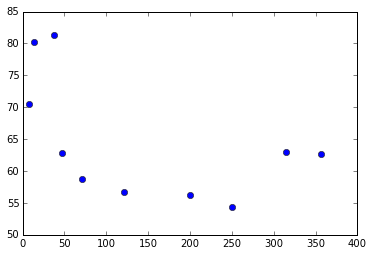

In [53]:
hum_mean = [df_ravenna['humidity'].mean(),
     df_cesena['humidity'].mean(),
     df_faenza['humidity'].mean(),
     df_ferrara['humidity'].mean(),
     df_bologna['humidity'].mean(),
     df_mantova['humidity'].mean(),
     df_piacenza['humidity'].mean(),
     df_milano['humidity'].mean(),
     df_asti['humidity'].mean(),
     df_torino['humidity'].mean()
]
plt.plot(dist,hum_mean,'bo')

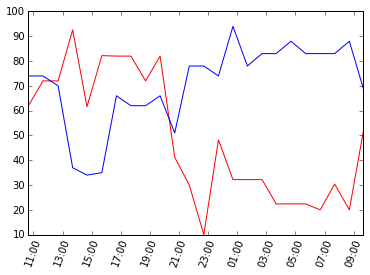

In [54]:
y1 = df_ravenna['wind_speed']*20
y2 = df_ravenna['humidity']
x = df_ravenna['day']
fig, ax = plt.subplots()
plt.xticks(rotation=70)
hours = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(hours)
plt.plot(x,y1,'r',x,y2,'b')

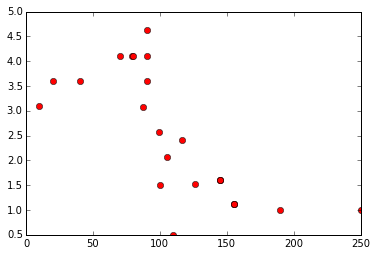

In [55]:
plt.plot(df_ravenna['wind_deg'],df_ravenna['wind_speed'],'ro')

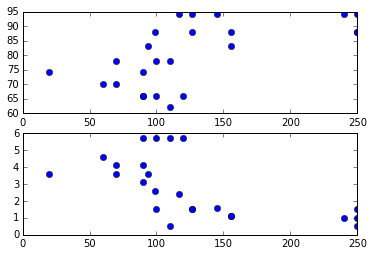

In [56]:
plt.subplot(211)
plt.plot(df_cesena['wind_deg'],df_cesena['humidity'],'bo')
plt.subplot(212)
plt.plot(df_cesena['wind_deg'],df_cesena['wind_speed'],'bo')

In [57]:
df_ravenna[['wind_deg','wind_speed','day']]

,wind_deg,wind_speed,day
0,10,3.1,2015-07-14 10:39:37
1,20,3.6,2015-07-14 11:39:19
2,40,3.6,2015-07-14 12:41:51
3,90,4.63,2015-07-14 13:41:46
4,87,3.08,2015-07-14 14:40:46
5,79,4.11,2015-07-14 15:42:10
6,70,4.1,2015-07-14 16:42:09
7,80,4.1,2015-07-14 17:41:53
8,90,3.6,2015-07-14 18:42:15
9,90,4.1,2015-07-14 19:42:05


In [58]:
df_cesena[['wind_deg','wind_speed']]

,wind_deg,wind_speed
0,94.001,3.62
1,20,3.6
2,70,3.6
3,60,4.6
4,70,4.1
5,90,5.7
6,100,5.7
7,120,5.7
8,110,5.7
9,90,4.1


In [59]:
hist, bins = np.histogram(df_ravenna['wind_deg'],8,[0,360])
print hist
print bins

[3 4 9 6 1 1 0 0]
[   0.   45.   90.  135.  180.  225.  270.  315.  360.]


In [60]:
def showRoseWind(values,city_name,max_value):
   N = 8
   theta = np.arange(0.,2 * np.pi, 2 * np.pi / N)
   radii = np.array(values)
   plt.axes([0.025, 0.025, 0.95, 0.95], polar=True)
   colors = [(1-x/max_value, 1-x/max_value, 0.75) for x in radii]
   plt.bar(theta, radii, width=(2*np.pi/N), bottom=0.0, color=colors)
   plt.title(city_name,x=0.2, fontsize=20)

[3 4 9 6 1 1 0 0]


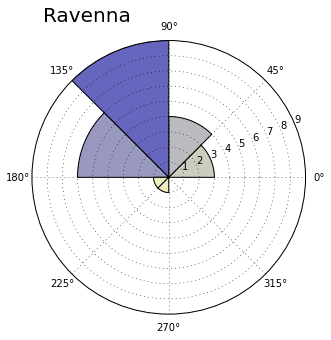

In [61]:
hist, bin = np.histogram(df_ravenna['wind_deg'],8,[0,360])
print hist
showRoseWind(hist,'Ravenna', 15.0)

[8 3 4 2 4 1 1 1]


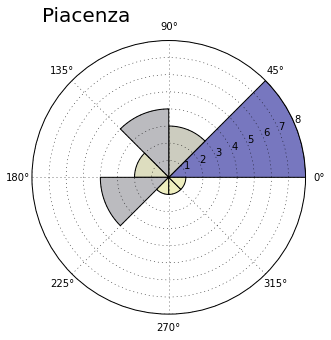

In [62]:
hist, bin = np.histogram(df_piacenza['wind_deg'],8,[0,360])
print hist
showRoseWind(hist,'Piacenza', 15.0)


In [63]:
print df_milano[df_milano['wind_deg']<45]['wind_speed']
print df_milano[df_milano['wind_deg']<45]['wind_speed'].mean()


1     2.6
3     2.1
5     2.1
13    0.5
14      1
18      1
21      1
Name: wind_speed, dtype: object
1.47142857143


In [64]:
print df_milano[df_milano['wind_deg']<45]['wind_speed'].mean()
#print df_milano[(df_milano['wind_deg']>0) & (df_milano['wind_deg']<45)]['wind_speed'].mean()
print df_milano[(df_milano['wind_deg']>44) & (df_milano['wind_deg']<90)]['wind_speed'].mean()
print df_milano[(df_milano['wind_deg']>89) & (df_milano['wind_deg']<135)]['wind_speed'].mean()
print df_milano[(df_milano['wind_deg']>134) & (df_milano['wind_deg']<180)]['wind_speed'].mean()
print df_milano[(df_milano['wind_deg']>179) & (df_milano['wind_deg']<225)]['wind_speed'].mean()
print df_milano[(df_milano['wind_deg']>224) & (df_milano['wind_deg']<270)]['wind_speed'].mean()
print df_milano[(df_milano['wind_deg']>269) & (df_milano['wind_deg']<315)]['wind_speed'].mean()
#print df_milano[(df_milano['wind_deg']>314) & (df_milano['wind_deg']<360)]['wind_speed'].mean()
print df_milano[df_milano['wind_deg']>314]['wind_speed'].mean()

1.47142857143
2.04
2.06666666667
2.05
2.68333333333
2.1
nan
nan


In [79]:
degs = np.arange(45,361,45)
print degs

[ 45  90 135 180 225 270 315 360]


In [80]:
tmp =  []
for deg in degs:
    #print df_milano[(df_milano['wind_deg']>(deg-46)) & (df_milano['wind_deg']<deg)]['wind_speed'].mean()
    tmp.append(df_milano[(df_milano['wind_deg']>(deg-46)) & (df_milano['wind_deg']<deg)]['wind_speed'].mean())
speeds = np.array(tmp)
print speeds

[ 1.675              nan         nan         nan  2.93333333  3.13636364
  2.58               nan]


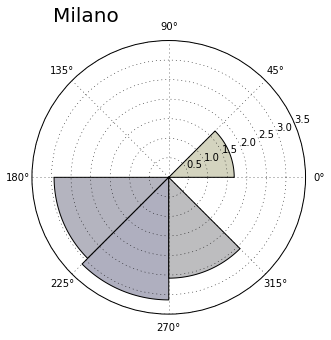

In [81]:
N = 8
theta = np.arange(0.,2 * np.pi, 2 * np.pi / N)
radii = np.array(speeds)
plt.axes([0.025, 0.025, 0.95, 0.95], polar=True)
colors = [(1-x/10.0, 1-x/10.0, 0.75) for x in radii]
bars = plt.bar(theta, radii, width=(2*np.pi/N), bottom=0.0, color=colors)
plt.title('Milano',x=0.2, fontsize=20)


In [293]:
def RoseWind_Speed(df_city):
   degs = np.arange(45,361,45)
   tmp =  []
   for deg in degs:
      tmp.append(df_city[(df_city['wind_deg']>(deg-46)) & (df_city['wind_deg']<deg)]['wind_speed'].mean())
   return np.array(tmp)

In [296]:
def showRoseWind_Speed(speeds,city_name):
   N = 8
   theta = np.arange(0.,2 * np.pi, 2 * np.pi / N)
   radii = np.array(speeds)
   plt.axes([0.025, 0.025, 0.95, 0.95], polar=True)
   colors = [(1-x/10.0, 1-x/10.0, 0.75) for x in radii]
   bars = plt.bar(theta, radii, width=(2*np.pi/N), bottom=0.0, color=colors)
   plt.title(city_name,x=0.2, fontsize=20)

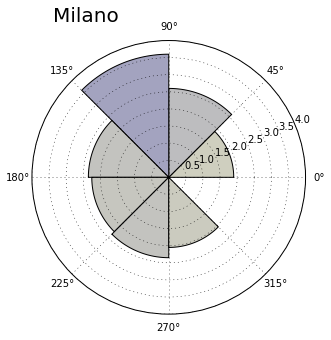

In [412]:
showRoseWind(RoseWind_Speed(df_milano),'Milano',10)

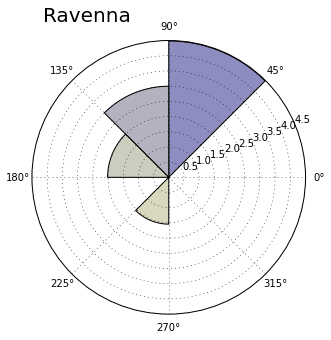

In [413]:
showRoseWind_Speed(RoseWind_Speed(df_ravenna),'Ravenna')

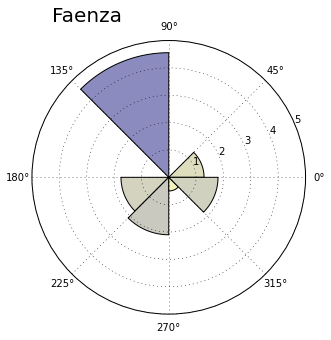

In [299]:
showRoseWind_Speed(RoseWind_Speed(df_faenza),'Faenza')

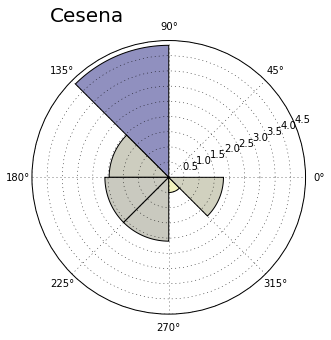

In [300]:
showRoseWind_Speed(RoseWind_Speed(df_cesena),'Cesena')

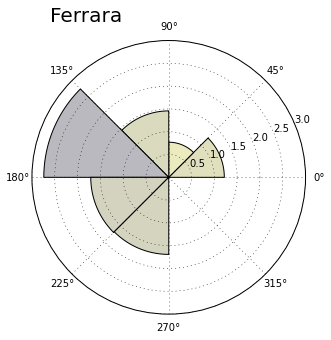

In [301]:
showRoseWind_Speed(RoseWind_Speed(df_ferrara),'Ferrara')

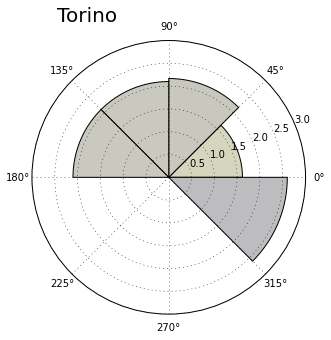

In [302]:
showRoseWind_Speed(RoseWind_Speed(df_torino),'Torino')

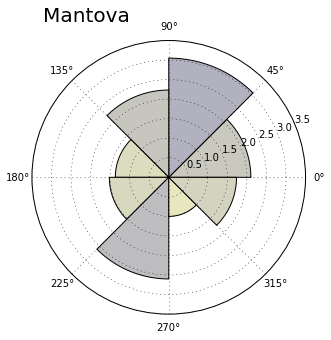

In [303]:
showRoseWind_Speed(RoseWind_Speed(df_mantova),'Mantova')

In [30]:
ferrara = pd.read_json('http://api.openweathermap.org/data/2.5/history/city?q=Ferrara,IT')

In [29]:
df_ferrara.to_csv('ferrara.csv')
df_milano.to_csv('milano.csv')
df_mantova.to_csv('mantova.csv')
df_ravenna.to_csv('ravenna.csv')
df_torino.to_csv('torino.csv')
df_asti.to_csv('asti.csv')
df_bologna.to_csv('bologna.csv')
df_piacenza.to_csv('piacenza.csv')
df_cesena.to_csv('cesena.csv')
df_faenza.to_csv('faenza.csv')